In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_directory="data/train"

In [3]:
train_data_generator=ImageDataGenerator(rescale=1/255)

In [4]:
train_generator=train_data_generator.flow_from_directory(train_directory,
                                                         target_size=(64,64),class_mode="binary",
                                                        batch_size=32)

Found 10532 images belonging to 2 classes.


In [5]:
val_directory="data/val"

In [6]:
val_data_generator=ImageDataGenerator(rescale=1/255)

In [7]:
val_generator=val_data_generator.flow_from_directory(val_directory,
                                                         target_size=(64,64),class_mode="binary",
                                                        batch_size=32)

Found 1316 images belonging to 2 classes.


In [8]:
from keras import layers,Input
from keras.models import Sequential

In [17]:
model=Sequential()


model.add(Input(shape=(64,64,3)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))


"""odel.add(layers.Conv2D(64,(3,3),activation="relu",input_shape=(64,64,1)))
model.add(layers.MaxPooling2D((2,2)))"""

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 flatten_2 (Flatten)         (None, 123008)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               15745152  
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15746177 (60.07 MB)
Trainable params: 15746177 (60.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [20]:
history=model.fit(train_generator,validation_data=val_generator,epochs=30)
print("işlem tamam")

Epoch 1/30
330/330 [==============================] - 41s 123ms/step - loss: 0.5828 - accuracy: 0.7866 - val_loss: 0.4261 - val_accuracy: 0.8055
Epoch 2/30
330/330 [==============================] - 40s 123ms/step - loss: 0.3337 - accuracy: 0.8587 - val_loss: 0.3500 - val_accuracy: 0.8549
Epoch 3/30
330/330 [==============================] - 41s 123ms/step - loss: 0.2831 - accuracy: 0.8858 - val_loss: 0.3041 - val_accuracy: 0.8754
Epoch 4/30
330/330 [==============================] - 41s 123ms/step - loss: 0.2510 - accuracy: 0.8992 - val_loss: 0.2823 - val_accuracy: 0.8891
Epoch 5/30
330/330 [==============================] - 41s 124ms/step - loss: 0.2233 - accuracy: 0.9086 - val_loss: 0.2705 - val_accuracy: 0.8967
Epoch 6/30
330/330 [==============================] - 41s 124ms/step - loss: 0.2025 - accuracy: 0.9177 - val_loss: 0.2725 - val_accuracy: 0.8967
Epoch 7/30
330/330 [==============================] - 41s 124ms/step - loss: 0.1811 - accuracy: 0.9313 - val_loss: 0.2802 - val_ac

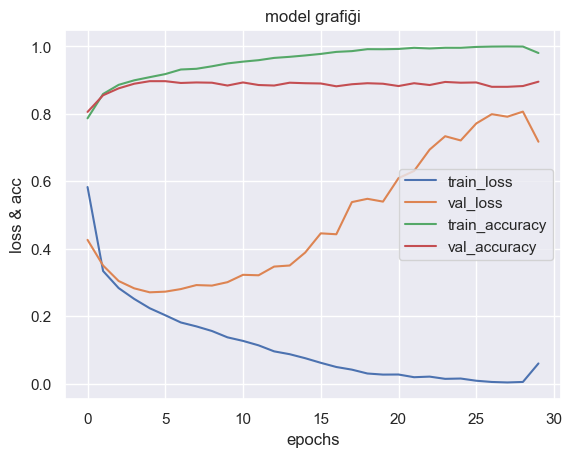

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
import numpy as np
epochs=30
plt.plot(np.arange(0,epochs),history.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs),history.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,epochs),history.history["accuracy"],label="train_accuracy")
plt.plot(np.arange(0,epochs),history.history["val_accuracy"],label="val_accuracy")
plt.title("model grafiği")
plt.xlabel("epochs")
plt.ylabel("loss & acc")
plt.legend()
plt.show()

In [23]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                fill_mode="nearest")

In [25]:
validation_datagen=ImageDataGenerator(rescale=1/255)

In [26]:
train_generator=train_datagen.flow_from_directory(train_directory,target_size=(64,64),
                                                 batch_size=32, class_mode="binary")

Found 10532 images belonging to 2 classes.


In [27]:
validation_generator=validation_datagen.flow_from_directory(val_directory,target_size=(64,64),
                                                 batch_size=32, class_mode="binary")

Found 1316 images belonging to 2 classes.


In [32]:
model=Sequential()


model.add(Input(shape=(64,64,3)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(96,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [33]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 96)        27744     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 128)       110720    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 128)        

In [34]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [36]:
history=model.fit(train_generator,validation_data=val_generator,epochs=30)
print("işlem tamam")

Epoch 1/30
330/330 [==============================] - 33s 99ms/step - loss: 0.5922 - accuracy: 0.7197 - val_loss: 0.5805 - val_accuracy: 0.7196
Epoch 2/30
330/330 [==============================] - 34s 104ms/step - loss: 0.5847 - accuracy: 0.7197 - val_loss: 0.5606 - val_accuracy: 0.7196
Epoch 3/30
330/330 [==============================] - 32s 98ms/step - loss: 0.5800 - accuracy: 0.7197 - val_loss: 0.5614 - val_accuracy: 0.7196
Epoch 4/30
330/330 [==============================] - 32s 97ms/step - loss: 0.5725 - accuracy: 0.7197 - val_loss: 0.5287 - val_accuracy: 0.7196
Epoch 5/30
330/330 [==============================] - 32s 98ms/step - loss: 0.5616 - accuracy: 0.7193 - val_loss: 0.5164 - val_accuracy: 0.7242
Epoch 6/30
330/330 [==============================] - 32s 98ms/step - loss: 0.5436 - accuracy: 0.7307 - val_loss: 0.4810 - val_accuracy: 0.7865
Epoch 7/30
330/330 [==============================] - 32s 98ms/step - loss: 0.5245 - accuracy: 0.7419 - val_loss: 0.4760 - val_accuracy

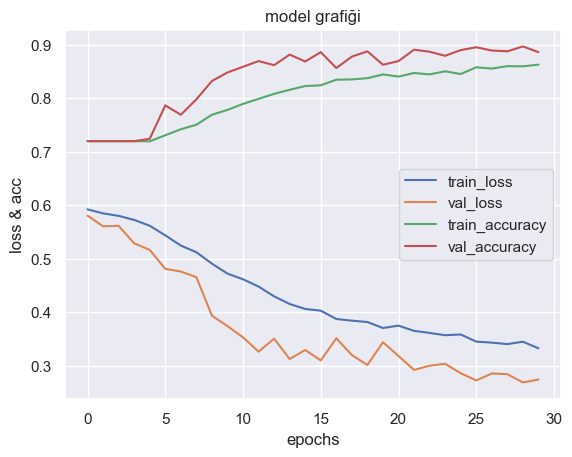

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
import numpy as np
epochs=30
plt.plot(np.arange(0,epochs),history.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs),history.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,epochs),history.history["accuracy"],label="train_accuracy")
plt.plot(np.arange(0,epochs),history.history["val_accuracy"],label="val_accuracy")
plt.title("model grafiği")
plt.xlabel("epochs")
plt.ylabel("loss & acc")
plt.legend()
plt.show()

In [38]:
model.save("btk.keras")

In [115]:
from keras.preprocessing.image import load_img,img_to_array
from keras.models import load_model
import numpy as np

In [144]:
model_path="btk.keras"
img_path="2918.jpg"

'2918.jpg'

In [129]:
predict_model=load_model(model_path)
test_img=load_img(img_path,target_size=(64,64))

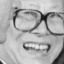

In [130]:
test_img

In [131]:
test_img=img_to_array(test_img)

In [132]:
test_img.shape

(64, 64, 3)

In [136]:
test_img1=np.expand_dims(test_img,axis=0)

In [137]:
test_img1.shape

(1, 64, 64, 3)

In [138]:
train_generator.class_indices

{'negatives': 0, 'positives': 1}

In [139]:
result=predict_model.predict(test_img1)

1/1 [==============================] - 0s 104ms/step


In [140]:
result

array([[0.]], dtype=float32)

In [146]:
if result[0][0] <0.5:
    print(f"sınıf negatiftir")
    label="negative"
else:
    print("sınıf pozitiftir")
    label="pozitive"

sınıf negatiftir


In [147]:
import cv2
test_image=cv2.imread(img_path)

font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(test_image,label,(20,40),font,1,(255,0,0),2)
cv2.imshow("sonuc",test_image)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

In [149]:
import os
total=0
error=0
from tensorflow.keras.preprocessing import image
test_directory = 'data/test'

for category in os.listdir(test_directory):

    category_directory = os.path.join(test_directory, category)

    for image_name in os.listdir(category_directory):

        img_path = os.path.join(category_directory, image_name)
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.
        prediction = model.predict(img_array)

        # if path has positive and image is negative or path has negative and image is positive

        if (category == 'positives' and prediction[0] <= 0.5) or (category == 'negatives' and prediction[0] > 0.5):
            error += 1
        
        total += 1

print('Total:', total)
print('Error:', error)
print('Accuracy:', 1 - error / total)

1/1 [==============================] - 0s 20ms/step
Total: 1317
Error: 139
Accuracy: 0.894457099468489
